In [1]:
include("jl/all.jl");

In [2]:
?to_g_fft!

search: to_g_fft!



Given a 3D cubed box represented by $\rho$, solves the poisson equation $\nabla^2\phi=-4\pi\rho$ in a periodic fashion


In [3]:
x = zeros(1)+501
y = zeros(1)+501
z = zeros(1)+501
m = ones(1)
N = 256
rho=zeros(Complex64,(N,N,N))
rho = to_cic(x,y,z,m, rho, 1, 1000);

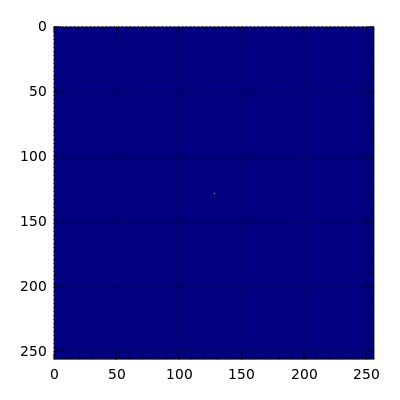

In [4]:
Winston.set_default_plot_size(400,400)
imagesc(real(rho[:,:,129]))
grid(true)

In [5]:
x=rand(Int(150000000))*999+1;
y=rand(Int(150000000))*999+1;
z=rand(Int(150000000))*999+1;
@time c = from_cic(x,y,z,rho,1,1000);

 29.530407 seconds (41.29 k allocations: 2.237 GB, 0.00% gc time)


In [9]:
from_cic(x+3.9,y,z,rho,1,1000)

1-element Array{Complex{Float64},1}:
 0.0016+0.0im

  3.377244 seconds (25.33 k allocations: 1.125 MB)


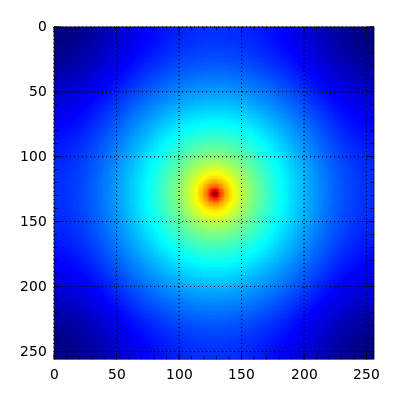

In [10]:
include("grid_grav.jl")
@time g = to_g_fft!(rho, 1000, 3.0)

imagesc(log(abs(g[:,:,129]))*100)
grid(true)

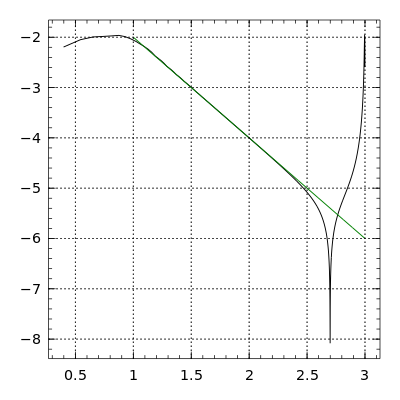

In [11]:
y = linspace(503.5,1500,1000)
x = ones(1000)*501
z = ones(1000)*501

hold(false)
plot(log10(y-501), log10(abs(from_cic_dy(x,y,z,g,1,1000))),"k-")
hold(true)

plot(log10(10:999), -2log10(10:999),"g")
#ylim(-5,1.0)
hold(false)
grid(true)

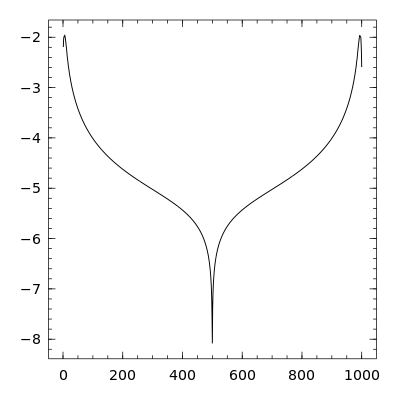

In [12]:
plot(log10(abs(from_cic_dy(x,y,z,abs(g),1,1000))))

In [13]:
from_cic_dy(x,y,z,abs(g),1,1000)

1000-element Array{Complex{Float64},1}:
 -0.00638735+0.0im
 -0.00893589+0.0im
  -0.0101273+0.0im
  -0.0103766+0.0im
  -0.0106259+0.0im
  -0.0108751+0.0im
   -0.010288+0.0im
 -0.00929652+0.0im
 -0.00830509+0.0im
 -0.00731366+0.0im
 -0.00649828+0.0im
 -0.00573907+0.0im
 -0.00497986+0.0im
            ⋮     
  0.00688075+0.0im
  0.00781311+0.0im
  0.00880454+0.0im
  0.00979597+0.0im
   0.0107874+0.0im
   0.0107496+0.0im
   0.0105003+0.0im
    0.010251+0.0im
   0.0100018+0.0im
  0.00765203+0.0im
  0.00510348+0.0im
  0.00255494+0.0im